In [6]:
import pandas as pd
import numpy as np

In [7]:
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns

In [8]:
%matplotlib inline

In [9]:
df = pd.read_csv('HR_comma_sep 2.csv')

In [10]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [9]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

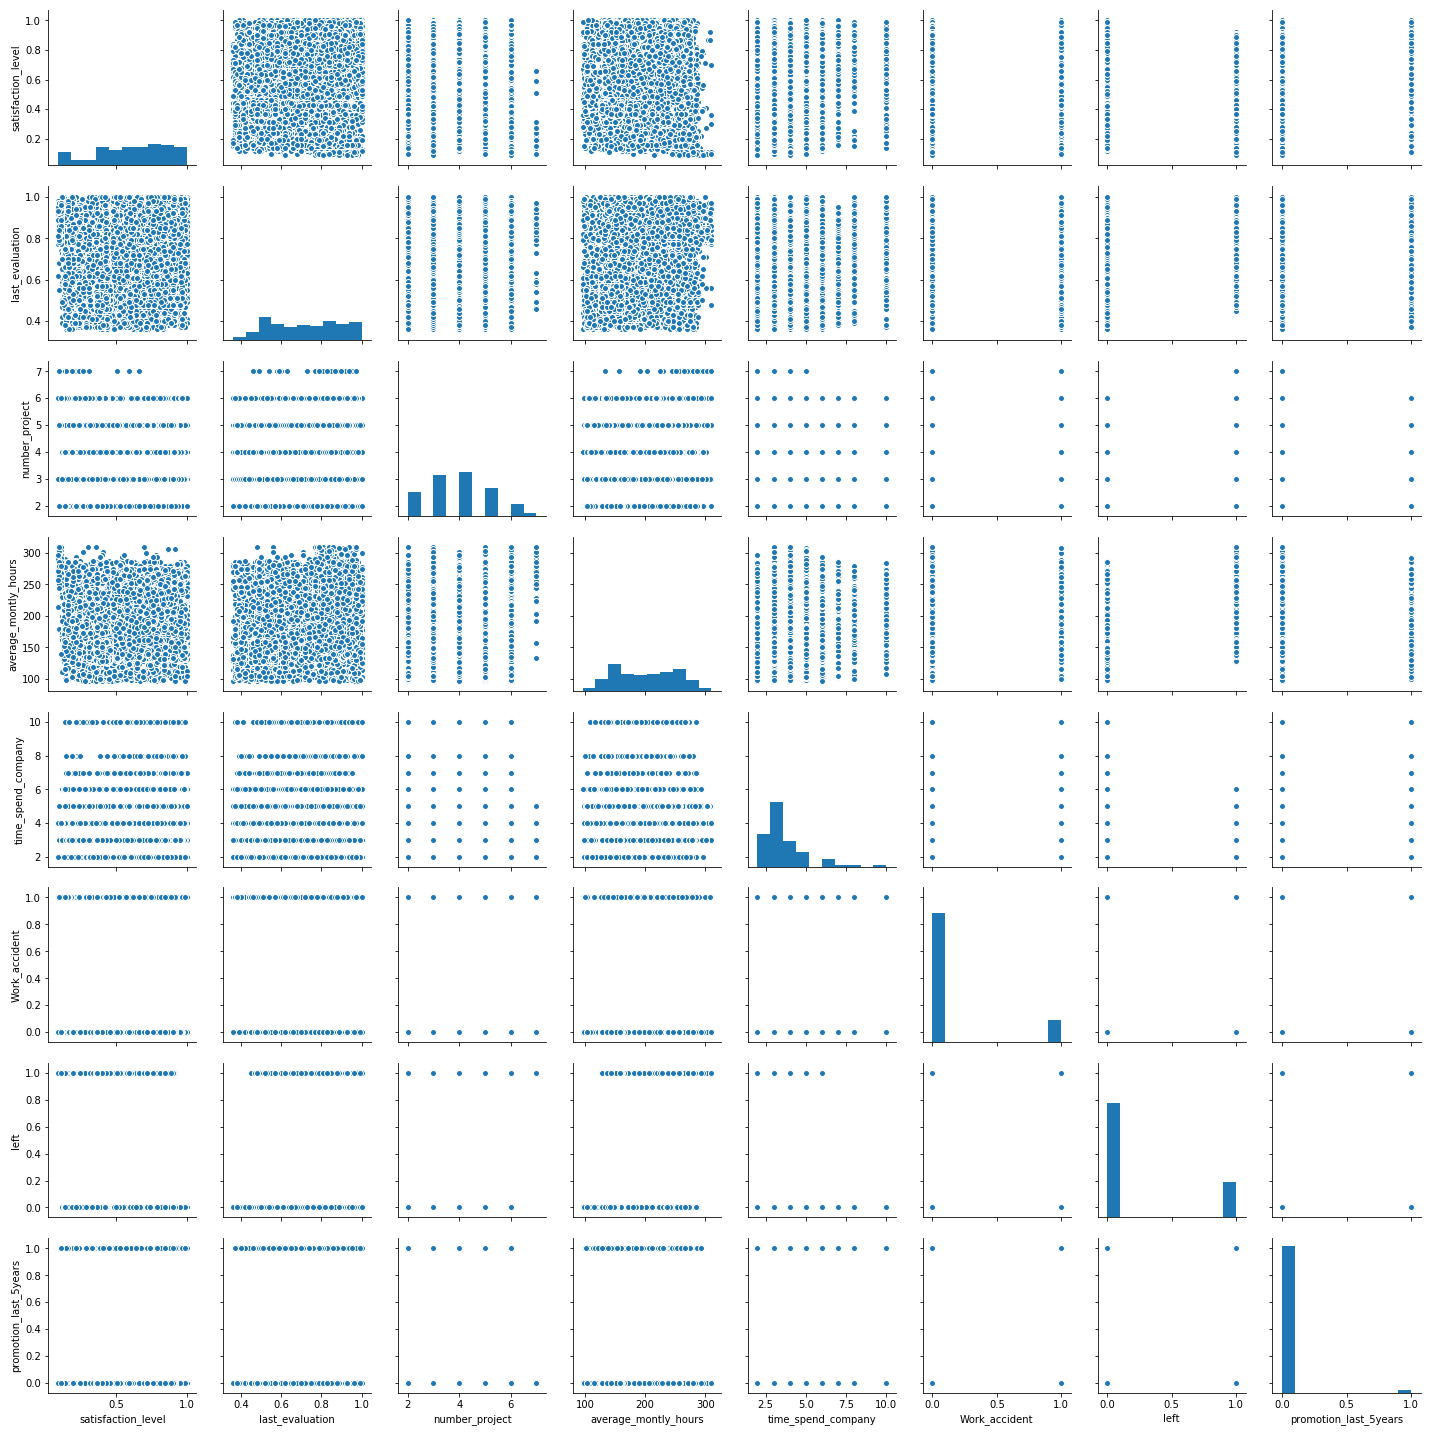

In [10]:
sns.pairplot(df)

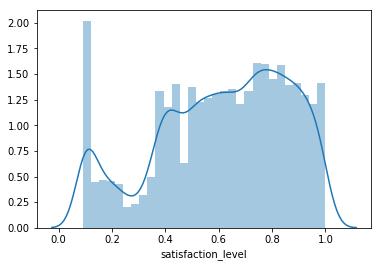

In [13]:
sns.distplot(df['satisfaction_level'])

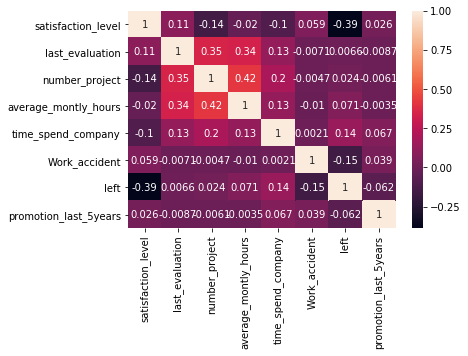

In [16]:
sns.heatmap(df.corr(),annot=True)

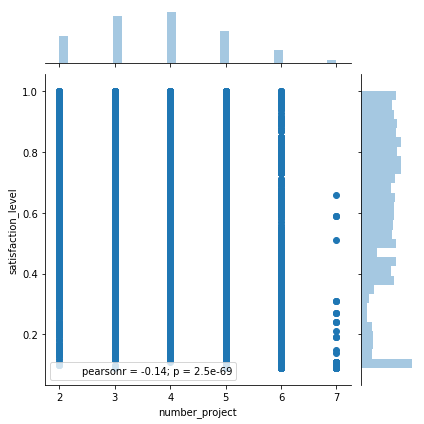

In [13]:
sns.jointplot(x='number_project', y='satisfaction_level',data=df)

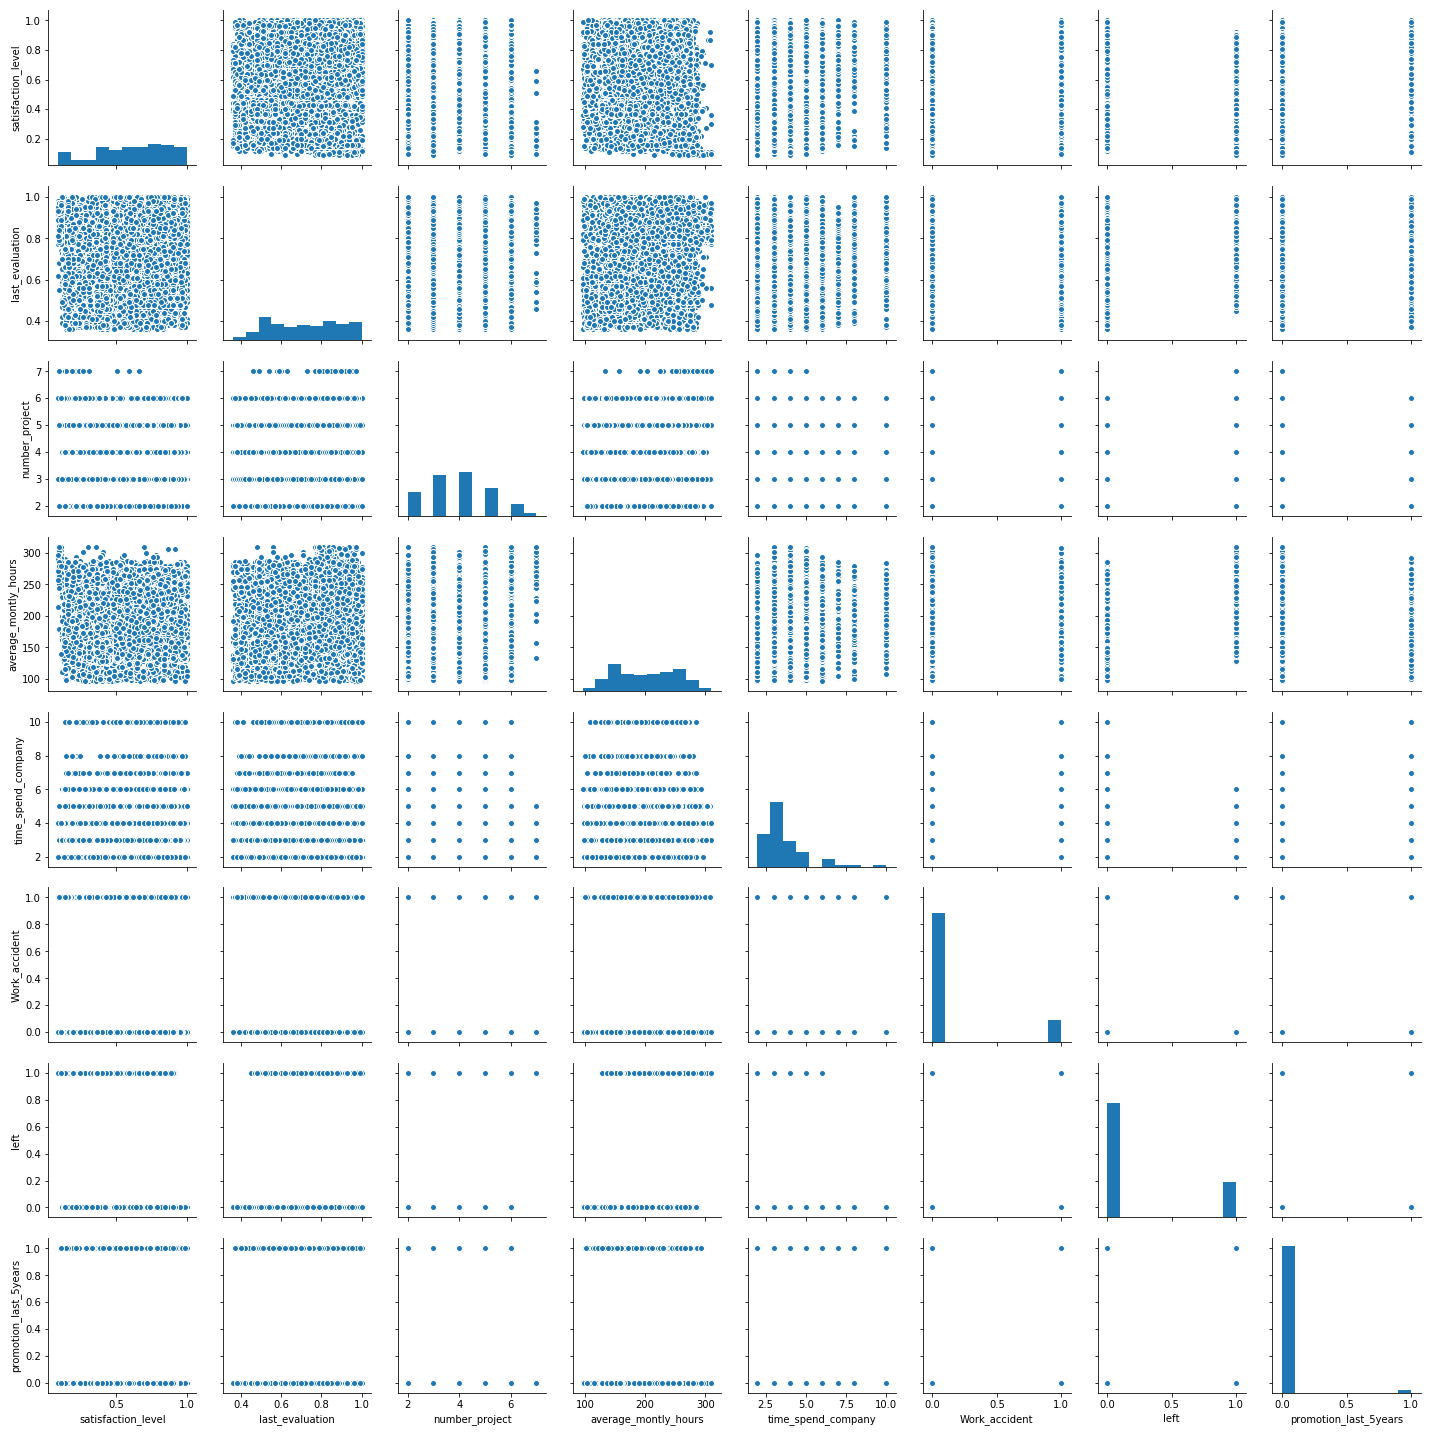

In [14]:
sns.pairplot(df)

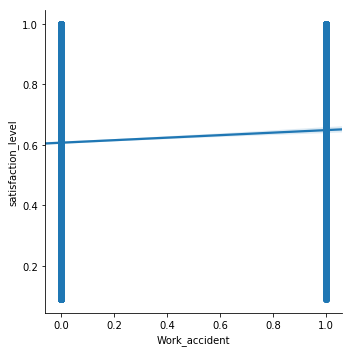

In [15]:
sns.lmplot(x='Work_accident', y='satisfaction_level',data=df)

In [17]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [32]:
y = df['satisfaction_level']
X = df[['last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years']]

In [33]:
from sklearn.cross_validation import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

In [35]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [36]:
lm.coef_

array([  2.41581775e-01,  -4.10827986e-02,   1.74130982e-04,
        -6.78935033e-03,  -8.92454347e-04,  -2.24422298e-01,
         6.53807292e-04])

In [37]:
prediction = lm.predict(X_test)

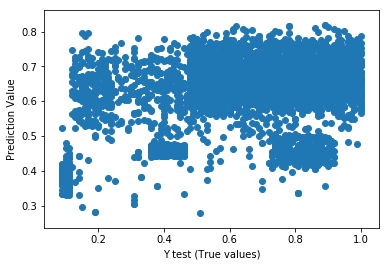

In [38]:
plt.scatter(y_test,prediction)
plt.xlabel('Y test (True values)')
plt.ylabel('Prediction Value')


In [39]:
# Mathimatice value
from sklearn import metrics

In [40]:
print('MAE', metrics.mean_absolute_error(y_test,prediction))
print('MSE', metrics.mean_squared_error(y_test, prediction))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE 0.179867630608
MSE 0.0498096337485
RMSE 0.22318071993


In [41]:
metrics.explained_variance_score(y_test,prediction)

0.19003777794879384

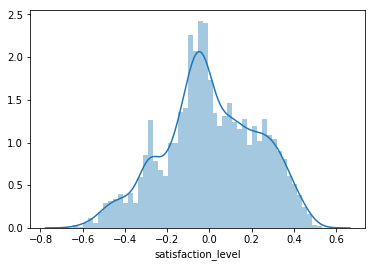

In [42]:
sns.distplot((y_test-prediction), bins=50)

In [43]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])
cdf


,Coeff
last_evaluation,0.241582
number_project,-0.041083
average_montly_hours,0.000174
time_spend_company,-0.006789
Work_accident,-0.000892
left,-0.224422
promotion_last_5years,0.000654
